# Imports

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
import numpy as np
import torchvision
from tqdm import tqdm_notebook as tqdm

# Path hack.
import sys, os
sys.path.insert(0, os.path.abspath('..'))

from visualization.plots import plot_learning_curves

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


# Load Data

In [3]:
mode = 'minibatch'

if mode == 'batch':
    batch_size = 60000
elif mode == 'minibatch':
    batch_size = 64
elif mode == 'sgd':
    batch_size = 1
    
test_batch_size = 64

In [5]:
train_loader = torch.utils.data.DataLoader(datasets.MNIST('data/mnist', train=True, download=True, 
                                                          transform=transforms.Compose([
                                                              transforms.ToTensor(),
                                                              transforms.Normalize((0.1307,), (0.3081,))
                                                          ])),
                                           batch_size=batch_size, shuffle=True)

test_loader = torch.utils.data.DataLoader(datasets.MNIST('data/mnist', train=False, download=True,
                                                         transform=transforms.Compose([
                                                             transforms.ToTensor(),
                                                             transforms.Normalize((0.1307,), (0.3081,))
                                                         ])),
                                          batch_size=test_batch_size, shuffle=True)

Processing...
Done!


## Show some sample images

In [6]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


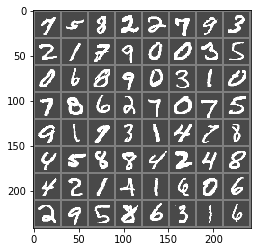

In [7]:
# get some random training images
dataiter = iter(test_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# Experiments with growing networks

## 10 neurons

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


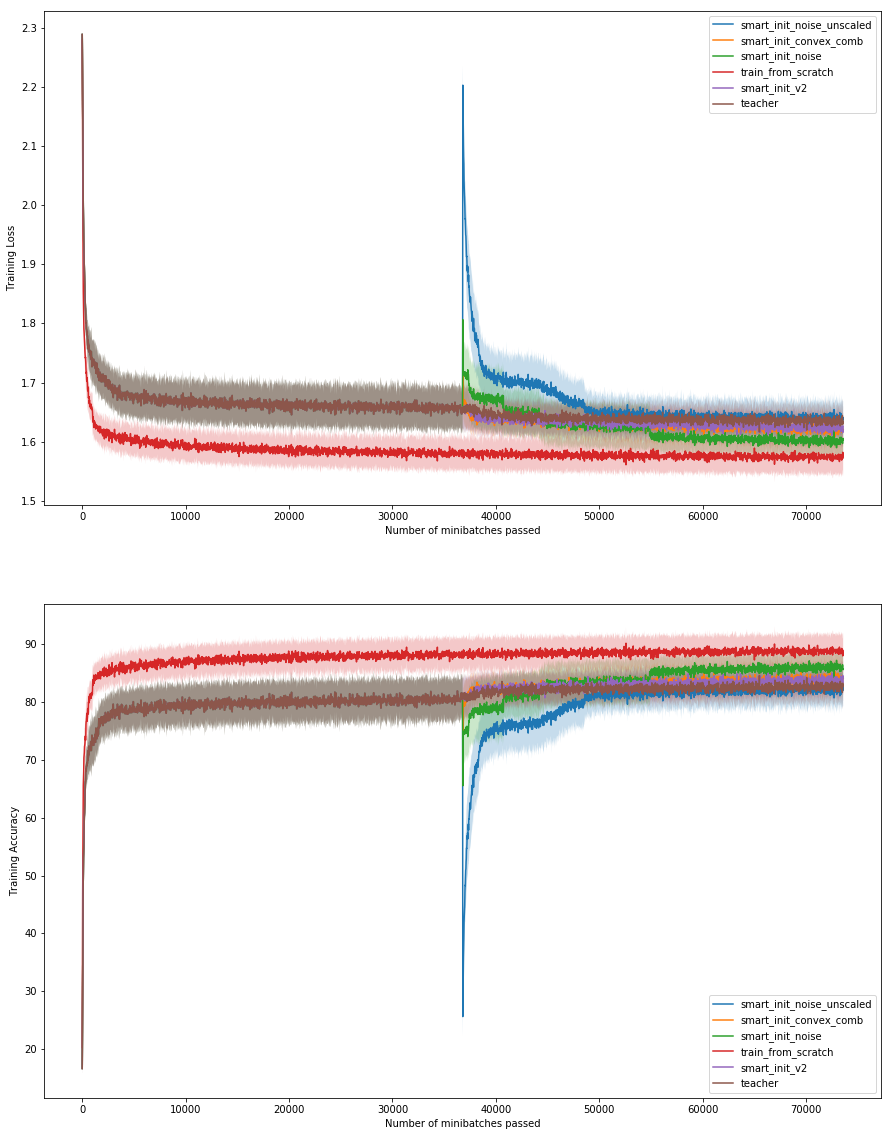

In [4]:
plot_learning_curves('/home/manu/Projects/dev/weightSymmetry/logs/mnist-full-training/1 hidden layers/10 neurons', teacher_dir='/home/manu/Projects/dev/weightSymmetry/logs/mnist-full-training/1 hidden layers/5 neurons/train_from_scratch')

## 20 neurons

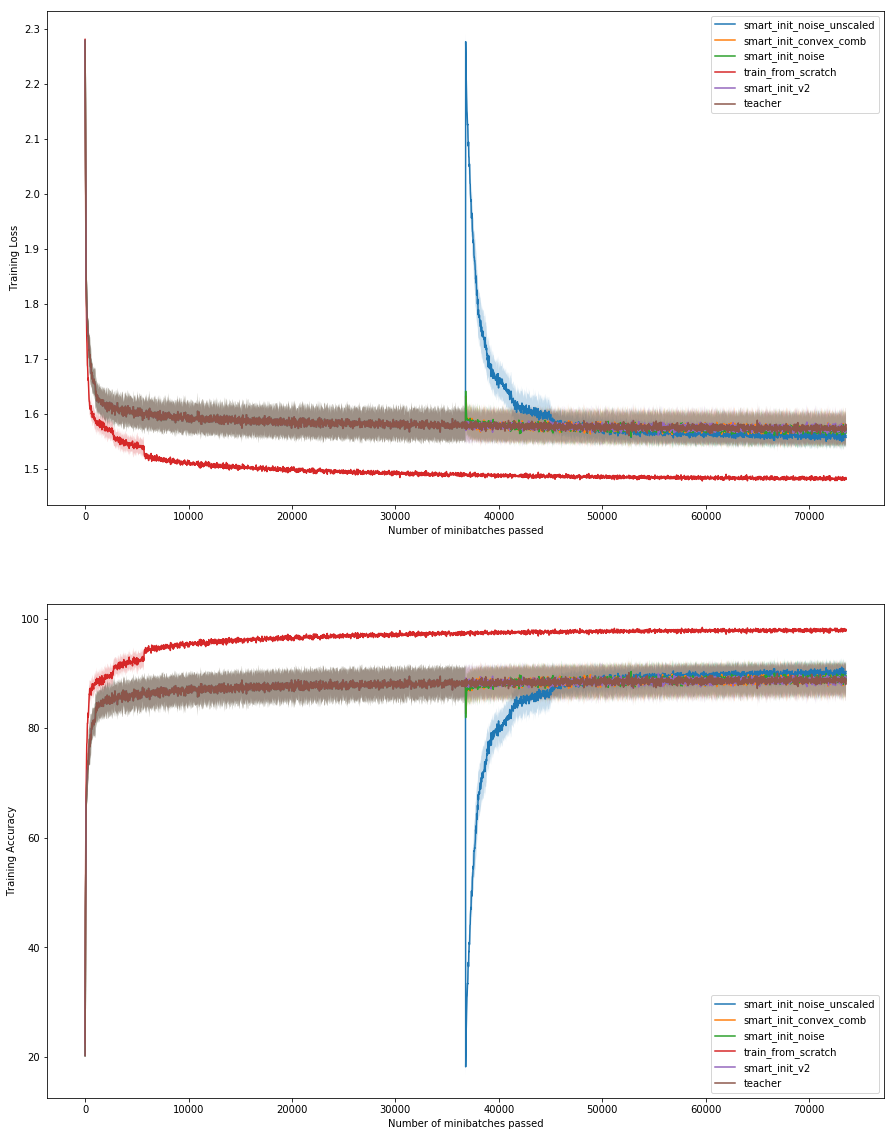

In [5]:
plot_learning_curves('/home/manu/Projects/dev/weightSymmetry/logs/mnist-full-training/1 hidden layers/20 neurons', teacher_dir='/home/manu/Projects/dev/weightSymmetry/logs/mnist-full-training/1 hidden layers/10 neurons/train_from_scratch')

## 40 neurons

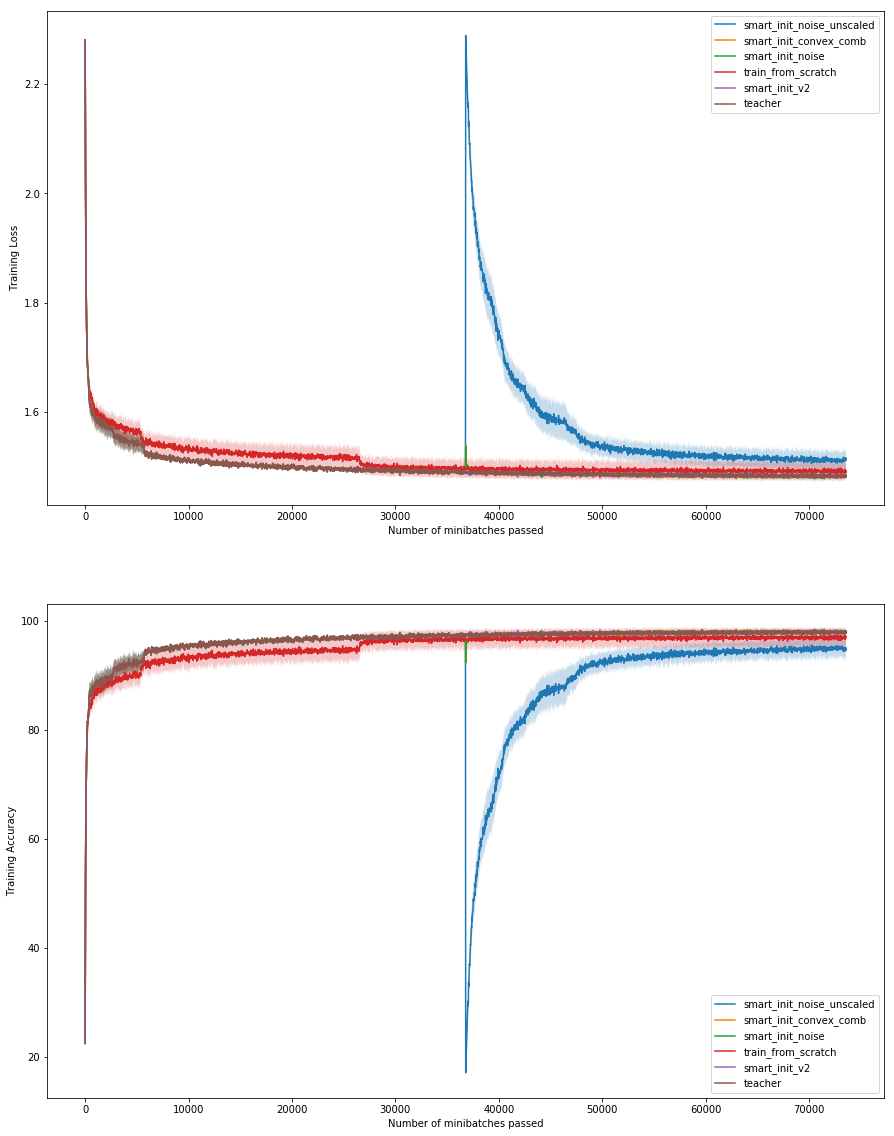

In [6]:
plot_learning_curves('/home/manu/Projects/dev/weightSymmetry/logs/mnist-full-training/1 hidden layers/40 neurons', teacher_dir='/home/manu/Projects/dev/weightSymmetry/logs/mnist-full-training/1 hidden layers/20 neurons/train_from_scratch')

## 80 neurons

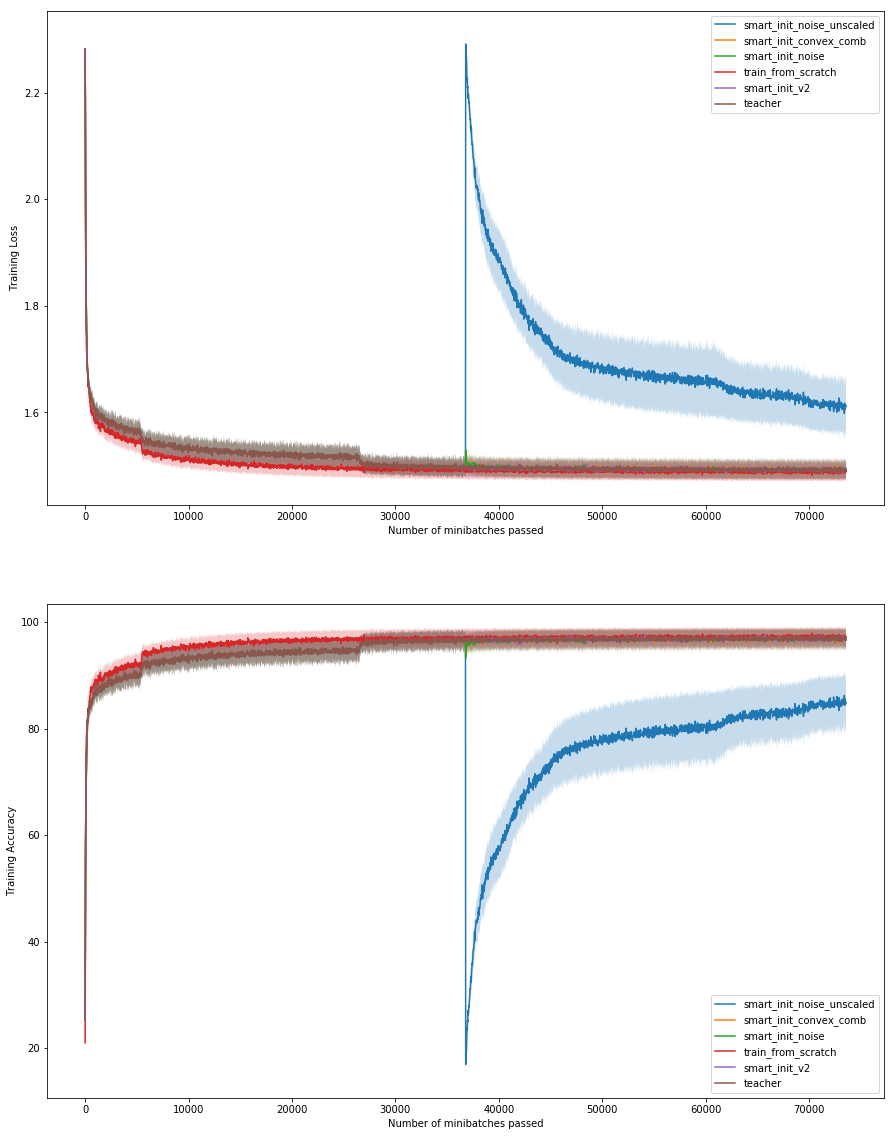

In [7]:
plot_learning_curves('/home/manu/Projects/dev/weightSymmetry/logs/mnist-full-training/1 hidden layers/80 neurons', teacher_dir='/home/manu/Projects/dev/weightSymmetry/logs/mnist-full-training/1 hidden layers/40 neurons/train_from_scratch')

## 2 Hidden Layers

## 10 neurons

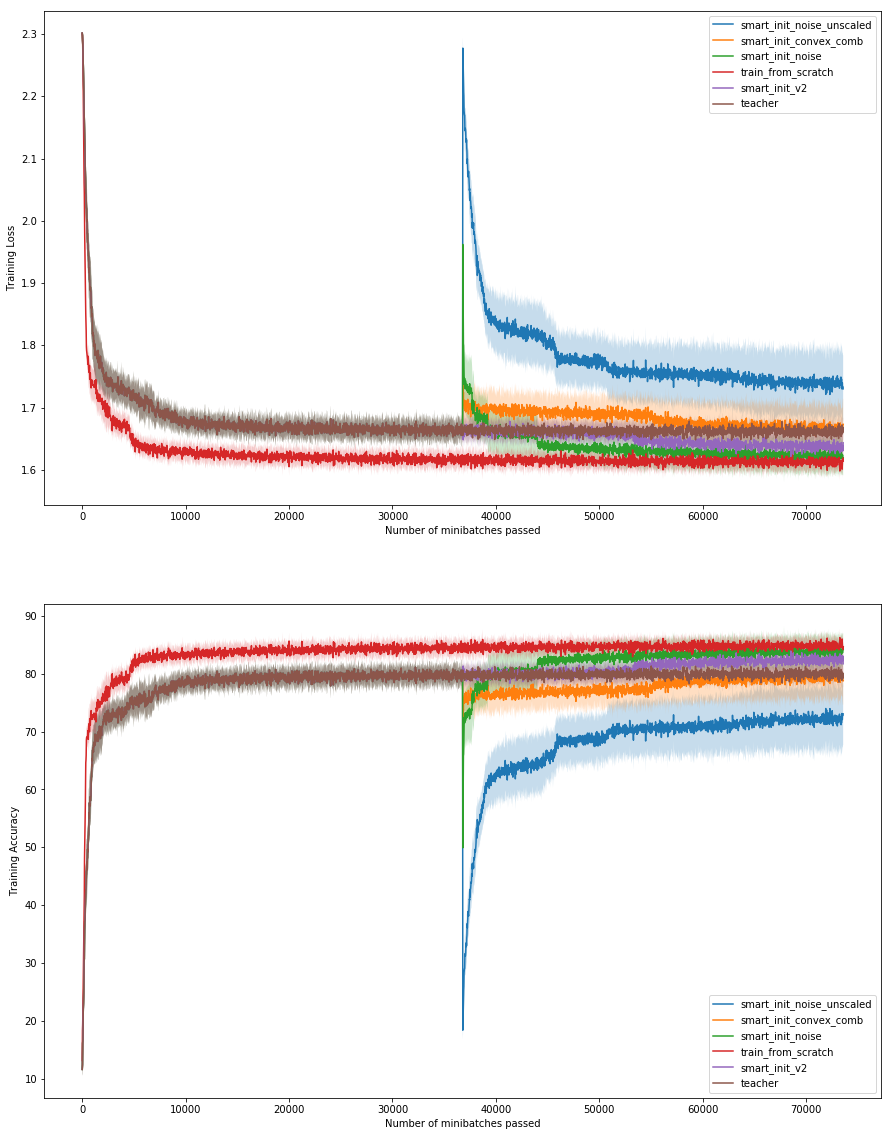

In [8]:
plot_learning_curves('/home/manu/Projects/dev/weightSymmetry/logs/mnist-full-training/2 hidden layers/10 neurons', teacher_dir='/home/manu/Projects/dev/weightSymmetry/logs/mnist-full-training/2 hidden layers/5 neurons/train_from_scratch')

## 20 neurons

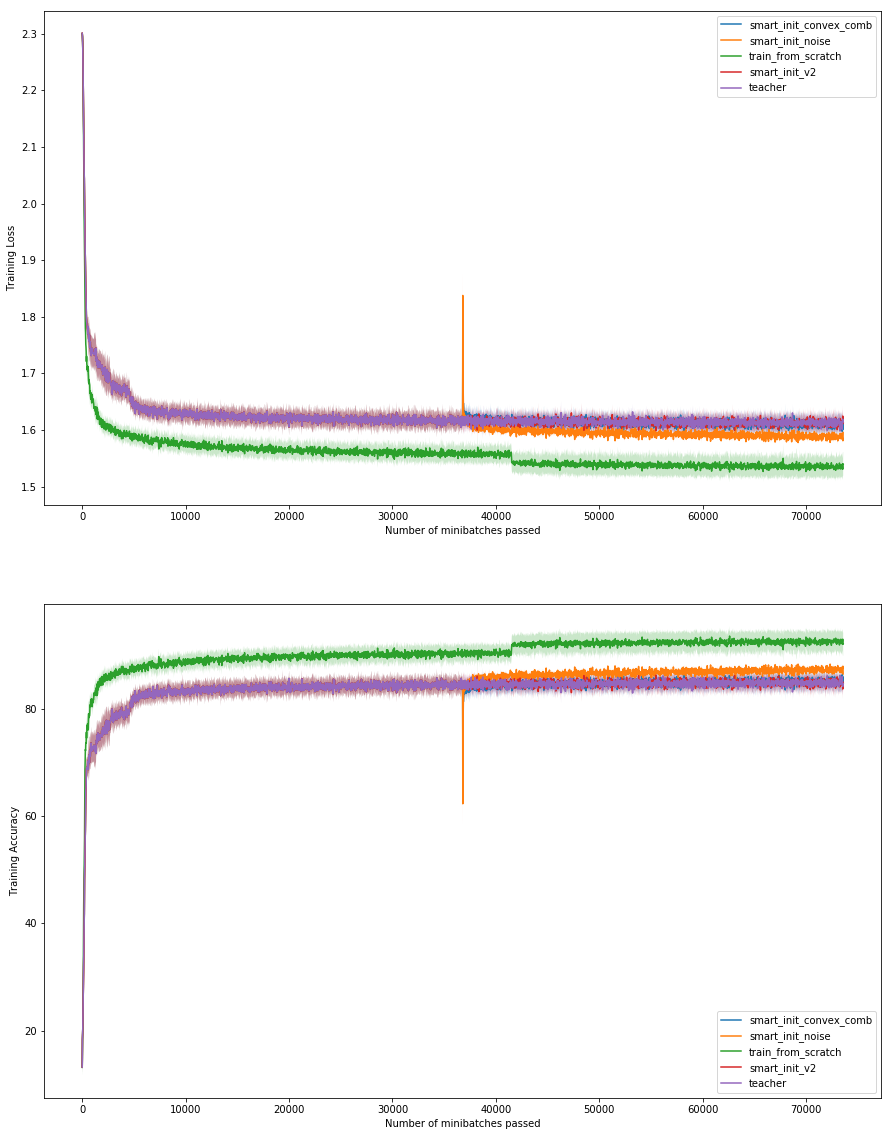

In [9]:
plot_learning_curves('/home/manu/Projects/dev/weightSymmetry/logs/mnist-full-training/2 hidden layers/20 neurons', teacher_dir='/home/manu/Projects/dev/weightSymmetry/logs/mnist-full-training/2 hidden layers/10 neurons/train_from_scratch')

## 40 neurons

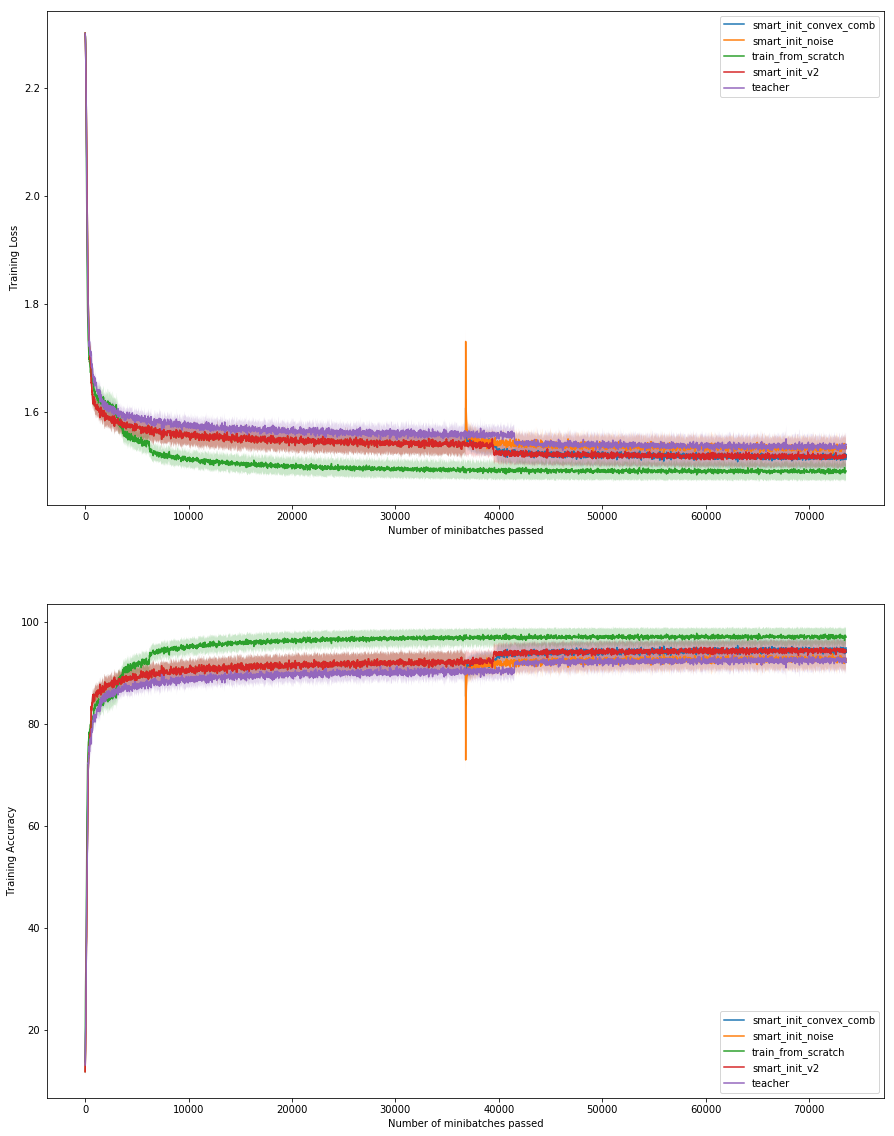

In [10]:
plot_learning_curves('/home/manu/Projects/dev/weightSymmetry/logs/mnist-full-training/2 hidden layers/40 neurons', teacher_dir='/home/manu/Projects/dev/weightSymmetry/logs/mnist-full-training/2 hidden layers/20 neurons/train_from_scratch')

# CIFAR10

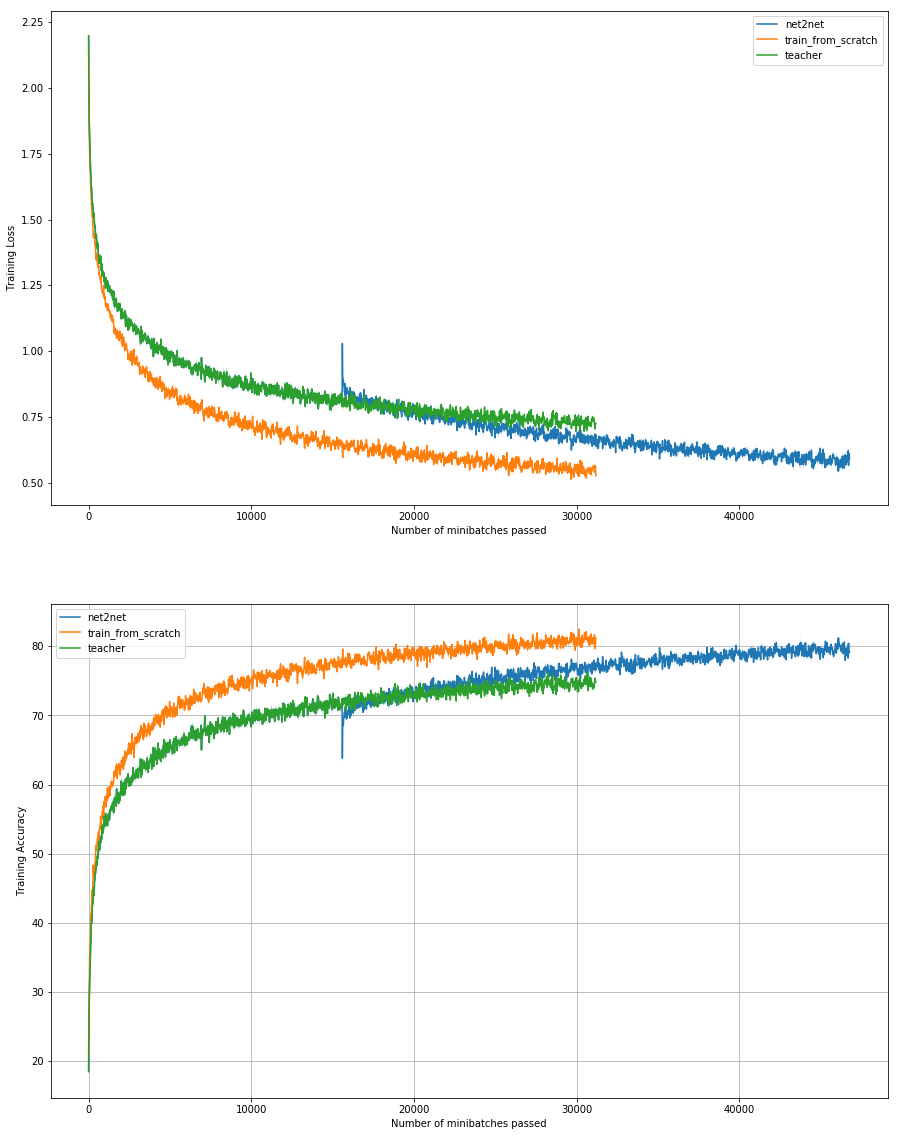

In [11]:
plot_learning_curves('/home/manu/Projects/dev/weightSymmetry/logs/cifar10', teacher_dir='/home/manu/Projects/dev/weightSymmetry/logs/cifar10/teacher')
plt.grid()

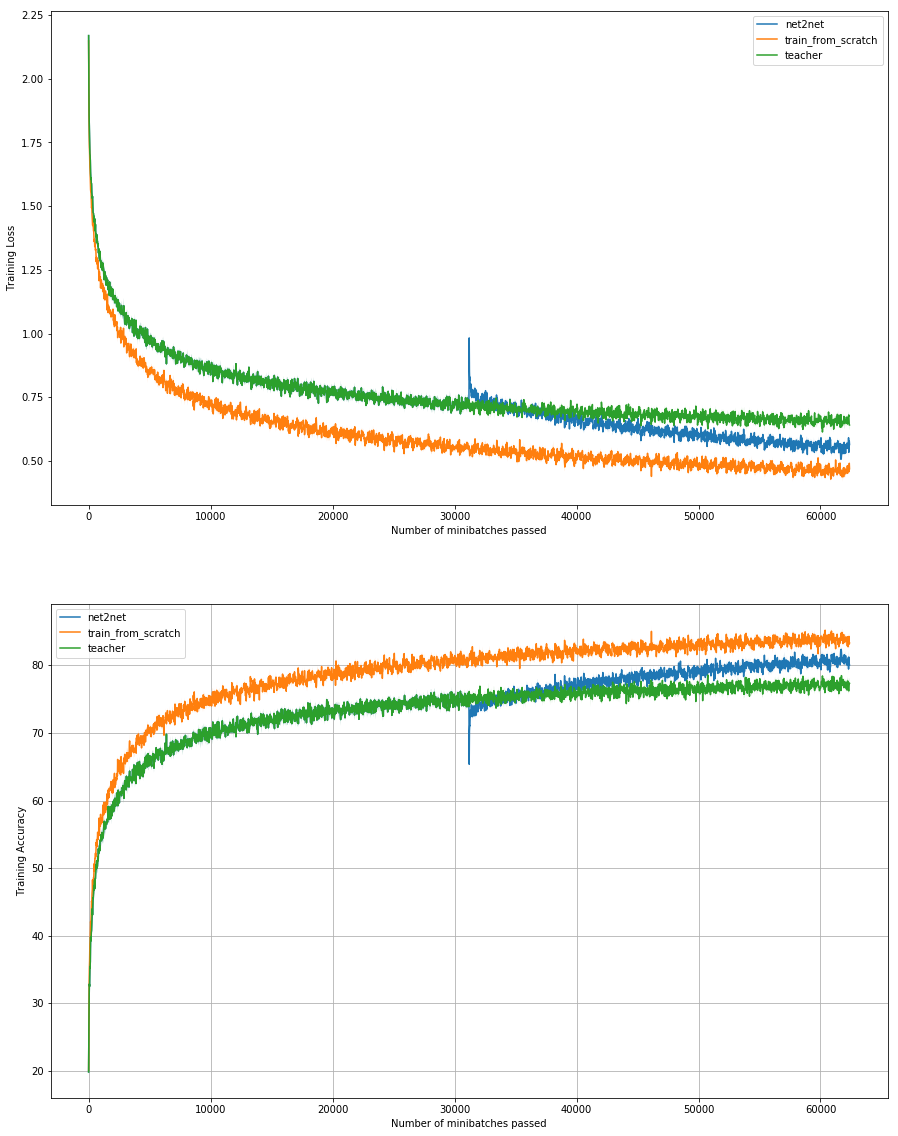

In [11]:
plot_learning_curves('/home/manu/Projects/dev/weightSymmetry/logs/cifar10', teacher_dir='/home/manu/Projects/dev/weightSymmetry/logs/cifar10/teacher')
plt.grid()

# Noise Levels

/home/manu/Software/anaconda3/envs/pytorch/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


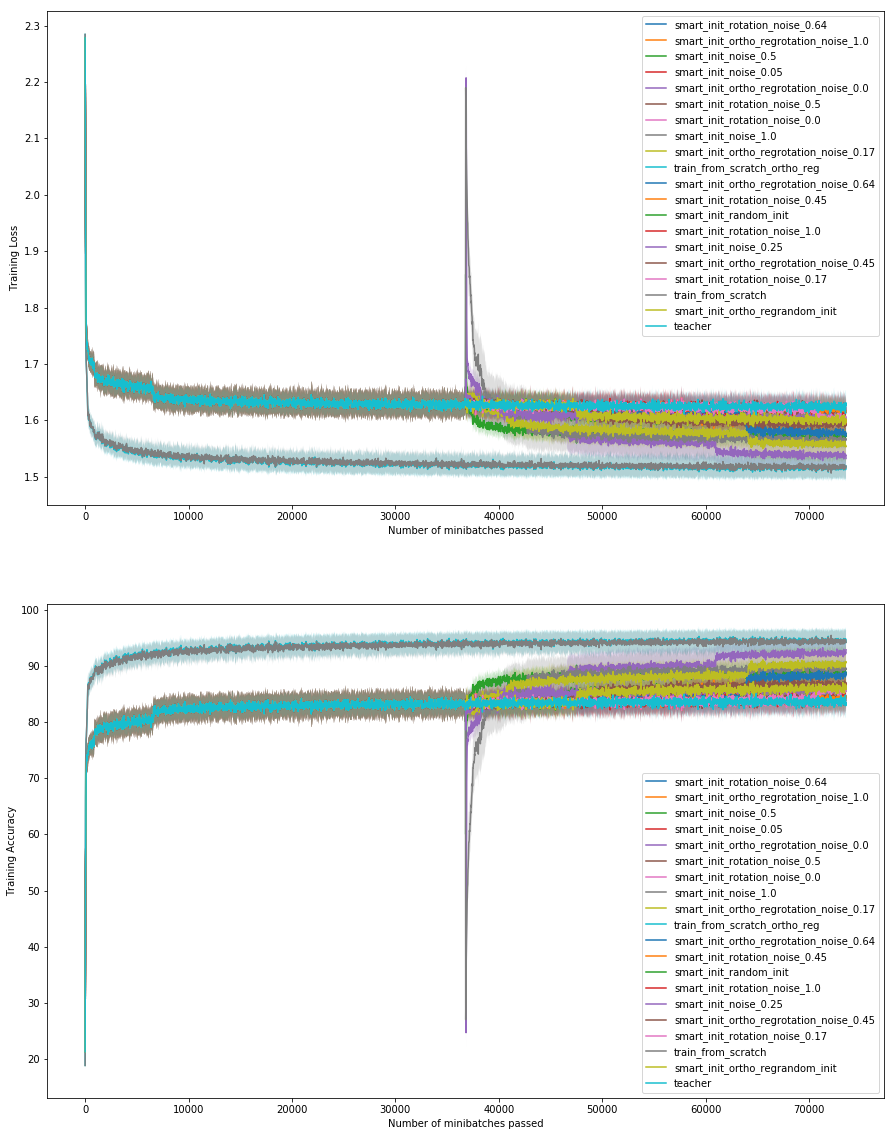

In [17]:
plot_learning_curves('/home/manu/Projects/dev/weightSymmetry/logs/mnist/1 hidden layer/20 neurons', teacher_dir='/home/manu/Projects/dev/weightSymmetry/logs/mnist/1 hidden layer/10 neurons/train_from_scratch')

In [11]:
parent_dir = '/home/manu/Projects/dev/weightSymmetry/logs/mnist/1 hidden layer/10 neurons'

for method in sorted(os.listdir(parent_dir)):
    method_dir = os.path.join(parent_dir, method)
    losses = []
    acc = []
    for f_name in os.listdir(method_dir):
        if os.path.isdir(os.path.join(method_dir, f_name)):
            # skip directories
            continue
        elif f_name.startswith('acc'):
            acc.append(np.load(os.path.join(method_dir, f_name))[-46:])

    acc = np.array(acc)
    print(method + ' ' + str(np.mean(acc)))

train_from_scratch 83.67764945652173


In [17]:
parent_dir = '/home/manu/Projects/dev/weightSymmetry/logs/mnist/1 hidden layer/20 neurons'

for method in sorted(os.listdir(parent_dir)):
    method_dir = os.path.join(parent_dir, method)
    losses = []
    acc = []
    for f_name in os.listdir(method_dir):
        if os.path.isdir(os.path.join(method_dir, f_name)):
            # skip directories
            continue
        elif f_name.startswith('acc'):
            acc.append(np.load(os.path.join(method_dir, f_name))[-46:])
        elif f_name.startswith('loss') and f_name.endswith('.npy'):
            losses.append(np.load(os.path.join(method_dir, f_name))[-46:])

    acc = np.array(acc)
    losses = np.array(losses)
    print(method + ' ' + str(np.mean(acc)) + ' ' + str(np.std(acc/5.0)))
#     print(method + ' ' + str(np.mean(acc)) + ' ' + str(np.mean(losses)))

smart_init_noise_0.05 84.11684782608695 0.9513920318166211
smart_init_noise_0.25 85.87296195652173 0.7621615341249627
smart_init_noise_0.5 89.0601222826087 0.7372895354720236
smart_init_noise_1.0 89.5883152173913 1.4934978834603414
smart_init_ortho_regrandom_init 86.01120923913044 0.7772972458624756
smart_init_ortho_regrotation_noise_0.0 92.32133152173913 0.9144906564528711
smart_init_ortho_regrotation_noise_0.17 90.30604619565217 1.3663626900337513
smart_init_ortho_regrotation_noise_0.45 86.69055706521739 0.7734028784426196
smart_init_ortho_regrotation_noise_0.64 88.28702445652173 1.1249772338230215
smart_init_ortho_regrotation_noise_1.0 86.4694293478261 0.778040678959364
smart_init_random_init 86.05095108695652 0.7688589184678561
smart_init_rotation_noise_0.0 83.82133152173913 0.9444748809180978
smart_init_rotation_noise_0.17 85.73879076086956 0.7510303902055805
smart_init_rotation_noise_0.45 84.1226222826087 0.9430186230307739
smart_init_rotation_noise_0.5 84.07370923913044 0.954867

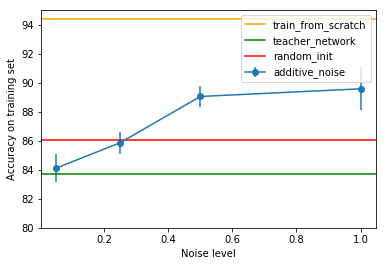

In [19]:
noise_levels = [0.05,0.25,0.5,1.0]
noise_accs = [84.11684782608695, 85.87296195652173, 89.0601222826087, 89.5883152173913]
noise_stds = [0.9513920318166211, 0.7621615341249627, 0.7372895354720236, 1.4934978834603414]

%matplotlib inline
plt.xlabel('Noise level')
plt.ylabel('Accuracy on training set')
plt.ylim(80,95)
plt.errorbar(noise_levels, noise_accs, yerr=noise_stds, marker = 'o', label='additive_noise')
plt.axhline(y=94.3773777173913,color='orange',label='train_from_scratch')
plt.axhline(y=83.67764945652173,color='green',label='teacher_network')
plt.axhline(y=86.05095108695652,color='red',label='random_init')
plt.legend()

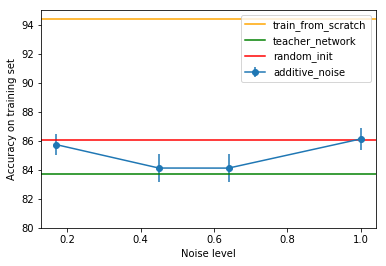

In [23]:
noise_levels = [0.17,0.45,0.64,1.0]
noise_accs = [85.73879076086956, 84.1226222826087, 84.11888586956522, 86.12703804347827]
noise_stds = [0.7510303902055805, 0.9430186230307739, 0.9591577784507955, 0.7681318787654914]

%matplotlib inline
plt.xlabel('Noise level')
plt.ylabel('Accuracy on training set')
plt.ylim(80,95)
plt.errorbar(noise_levels, noise_accs, yerr=noise_stds, marker = 'o', label='additive_noise')
plt.axhline(y=94.3773777173913,color='orange',label='train_from_scratch')
plt.axhline(y=83.67764945652173,color='green',label='teacher_network')
plt.axhline(y=86.05095108695652,color='red',label='random_init')
plt.legend()

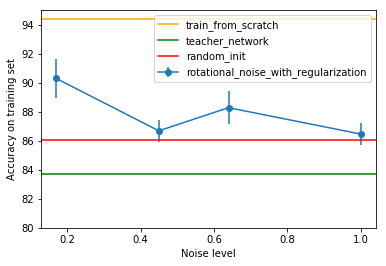

In [22]:
noise_levels = [0.17,0.45,0.64,1.0]
noise_accs = [90.30604619565217, 86.69055706521739, 88.28702445652173, 86.4694293478261]
noise_stds = [1.3663626900337513, 0.7734028784426196, 1.1249772338230215, 0.778040678959364]

%matplotlib inline
plt.xlabel('Noise level')
plt.ylabel('Accuracy on training set')
plt.ylim(80,95)
plt.errorbar(noise_levels, noise_accs, yerr=noise_stds, marker = 'o', label='rotational_noise_with_regularization')
plt.axhline(y=94.3773777173913,color='orange',label='train_from_scratch')
plt.axhline(y=83.67764945652173,color='green',label='teacher_network')
plt.axhline(y=86.05095108695652,color='red',label='random_init')
plt.legend()

In [38]:
parent_dir = '/home/manu/Projects/dev/weightSymmetry/logs/mnist/1 hidden layer/40 neurons'

for method in sorted(os.listdir(parent_dir)):
    method_dir = os.path.join(parent_dir, method)
    losses = []
    acc = []
    for f_name in os.listdir(method_dir):
        if os.path.isdir(os.path.join(method_dir, f_name)):
            # skip directories
            continue
        elif f_name.startswith('acc'):
            acc.append(np.load(os.path.join(method_dir, f_name))[-46:])
        elif f_name.startswith('loss') and f_name.endswith('.npy'):
            losses.append(np.load(os.path.join(method_dir, f_name))[-46:])

    acc = np.array(acc)
    losses = np.array(losses)
    print(method + ' ' + str(np.mean(acc)) + ' ' + str(np.std(acc/5.0)))
#     print(method + ' ' + str(np.mean(acc)) + ' ' + str(np.mean(losses)))

smart_init_noise_0.05 94.4993206521739 0.9141229324415553
smart_init_noise_0.25 94.54653532608695 0.9148673154964438
smart_init_noise_0.5 96.21976902173913 0.7454476885454872
smart_init_noise_1.0 97.41762907608695 0.09267855038670529
smart_init_ortho_regrandom_init_0.5 94.453125 0.8984023504466379
smart_init_ortho_regrotation_noise_0.0 99.22452445652173 0.05017529857896398
smart_init_ortho_regrotation_noise_0.17 99.14334239130434 0.0536511047828788
smart_init_ortho_regrotation_noise_0.45 96.9476902173913 0.7689251240392531
smart_init_ortho_regrotation_noise_0.64 94.94972826086956 0.9330992529180986
smart_init_ortho_regrotation_noise_1.0 94.84476902173913 0.9317150324741168
smart_init_random_init_0.5 94.43478260869566 0.8984657496380618
smart_init_rotation_noise_0.0 94.44836956521739 0.910183524284665
smart_init_rotation_noise_0.17 94.48063858695652 0.9128882588566777
smart_init_rotation_noise_0.45 94.50509510869566 0.9164178600787555
smart_init_rotation_noise_0.64 94.5461956521739 0.92

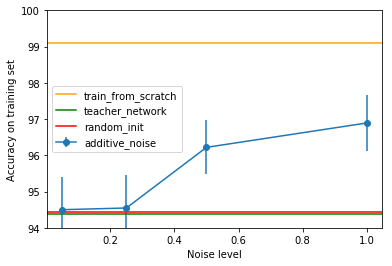

In [35]:
noise_levels = [0.05,0.25,0.5,1.0]
noise_accs = [94.4993206521739, 94.54653532608695, 96.21976902173913, 96.89171195652173]
noise_stds = [0.9141229324415553, 0.9148673154964438, 0.7454476885454872, 0.78120977446885112]

%matplotlib inline
plt.xlabel('Noise level')
plt.ylabel('Accuracy on training set')
plt.ylim(94,100)
plt.errorbar(noise_levels, noise_accs, yerr=noise_stds, marker = 'o', label='additive_noise')
plt.axhline(y=99.10495923913044,color='orange',label='train_from_scratch')
plt.axhline(y=94.3773777173913,color='green',label='teacher_network')
plt.axhline(y=94.43478260869566,color='red',label='random_init')
plt.legend()

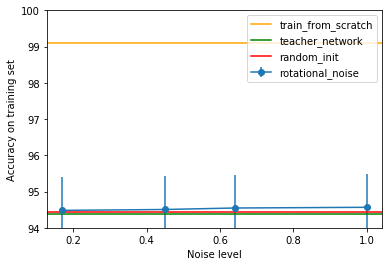

In [36]:
noise_levels = [0.17,0.45,0.64,1.0]
noise_accs = [94.48063858695652, 94.50509510869566, 94.5461956521739, 94.56589673913044]
noise_stds = [0.9128882588566777, 0.9164178600787555, 0.922603331606031, 0.9234607568623541]

%matplotlib inline
plt.xlabel('Noise level')
plt.ylabel('Accuracy on training set')
plt.ylim(94,100)
plt.errorbar(noise_levels, noise_accs, yerr=noise_stds, marker = 'o', label='rotational_noise')
plt.axhline(y=99.10495923913044,color='orange',label='train_from_scratch')
plt.axhline(y=94.3773777173913,color='green',label='teacher_network')
plt.axhline(y=94.43478260869566,color='red',label='random_init')
plt.legend(loc='upper right')

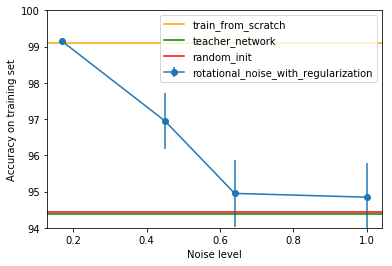

In [27]:
noise_levels = [0.17,0.45,0.64,1.0]
noise_accs = [99.14334239130434, 96.9476902173913, 94.94972826086956, 94.84476902173913]
noise_stds = [0.0536511047828788, 0.7689251240392531, 0.9330992529180986, 0.9317150324741168]

%matplotlib inline
plt.xlabel('Noise level')
plt.ylabel('Accuracy on training set')
plt.ylim(94,100)
plt.errorbar(noise_levels, noise_accs, yerr=noise_stds, marker = 'o', label='rotational_noise_with_regularization')
plt.axhline(y=99.10495923913044,color='orange',label='train_from_scratch')
plt.axhline(y=94.3773777173913,color='green',label='teacher_network')
plt.axhline(y=94.43478260869566,color='red',label='random_init')
plt.legend()

In [95]:
def generate_rotation_matrix(rot_angle, vector_dim, x):
    
    x = x/np.linalg.norm(x)
    
    y = np.random.randn(vector_dim)
    y = y - np.dot(y, x)*x
    y = y/np.linalg.norm(y)
    
    P = np.vstack([x,y])

    R = np.eye(2)
    R[0,0] = np.cos(rot_angle)
    R[1,1] = np.cos(rot_angle)
    R[0,1] = -np.sin(rot_angle)
    R[1,0] = np.cos(rot_angle)
    
    M = np.eye(vector_dim) + P.T@(R-np.eye(2))@P
    
    return M

In [178]:
def generate_rotation_matrix_simple(rot_angle, vector_dim):
    
    R = np.eye(vector_dim)
    idxs = np.random.choice(vector_dim, 2)
    
    idx = idxs[0]
    idx_2 = idxs[1]
    
    R[idx, idx] = np.cos(rot_angle)
    R[idx_2, idx_2] = np.cos(rot_angle)
    R[idx, idx_2] = -np.sin(rot_angle)
    R[idx_2, idx] = np.sin(rot_angle)
    
    return R

In [202]:
def generate_rotated_vector(rot_angle, x):
    
    vector_dim = len(x)
    
    nx = x/np.linalg.norm(x)
    
    y = np.random.randn(vector_dim)
    y = y - np.dot(y, nx)*nx
    y = y/np.linalg.norm(y)
    
    out = np.linalg.norm(x)*(np.cos(rot_angle)*nx + np.sin(rot_angle)*y)
    
    return out